In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Set matplotlib to display figures inline in the notebook
%matplotlib inline

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame for easier exploration
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = pd.Categorical.from_codes(y, iris.target_names)

In [3]:
# Display the first few rows of the dataset
print("Iris Dataset (First 5 rows):")
iris_df.head()

Iris Dataset (First 5 rows):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Dataset information
print("Dataset Shape:", iris_df.shape)
print("\nFeature Names:", feature_names)
print("\nTarget Classes:", target_names)

Dataset Shape: (150, 5)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Classes: ['setosa' 'versicolor' 'virginica']


In [5]:
# Explore the dataset statistics
print("Feature Statistics:")
iris_df.describe()

Feature Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Class distribution
print("Class Distribution:")
iris_df['species'].value_counts()

Class Distribution:


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

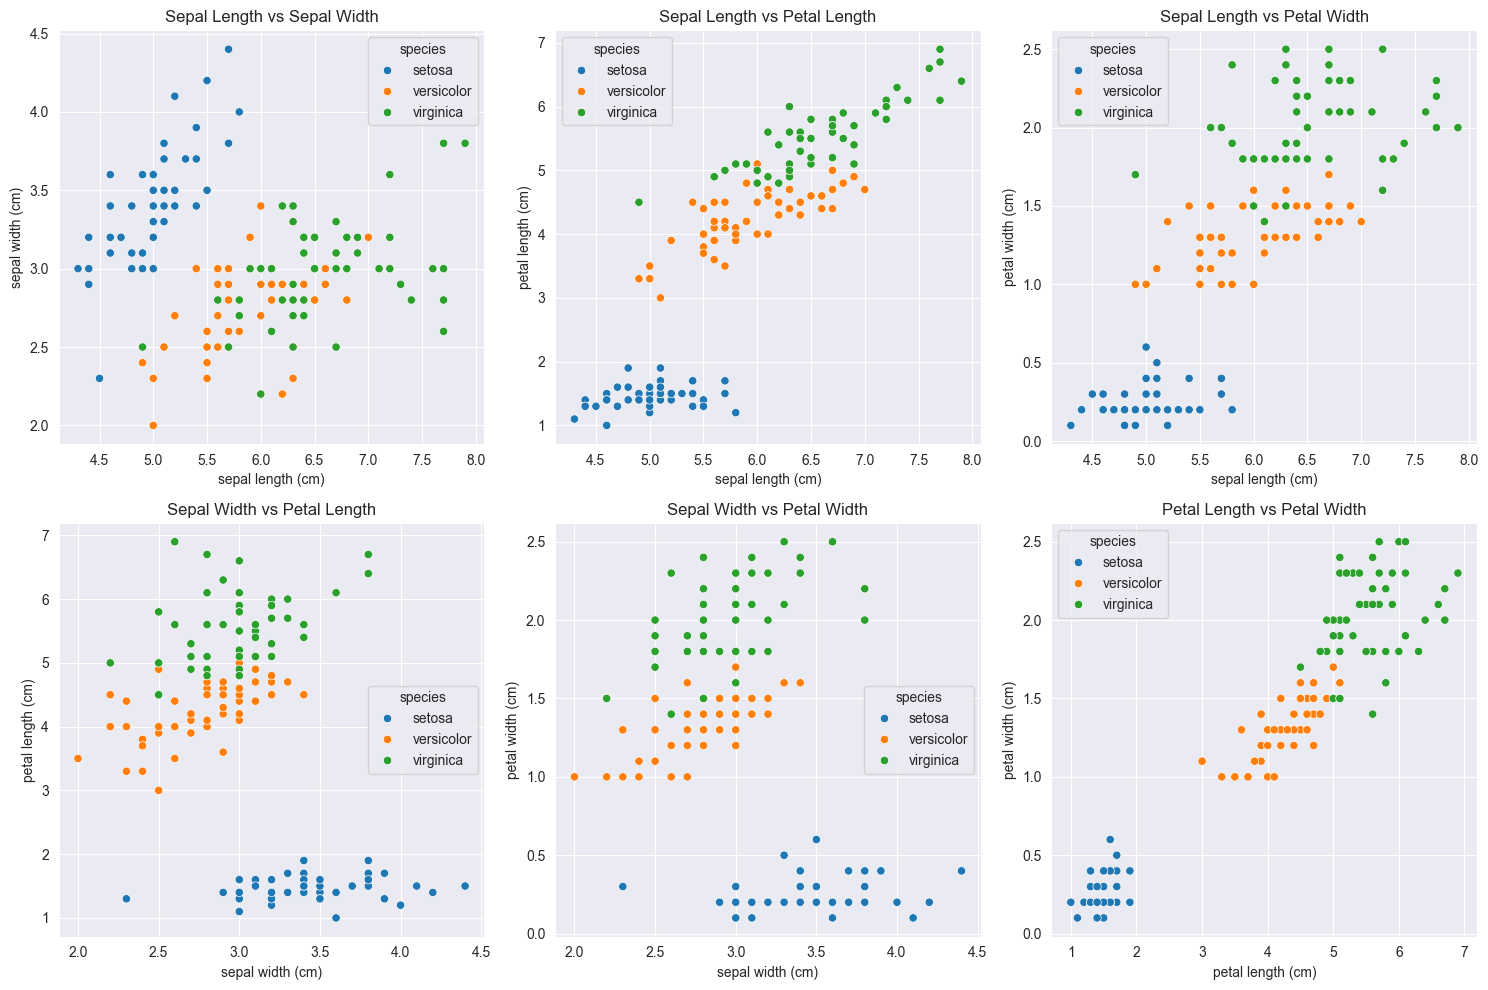

In [7]:
# Visualize the dataset with scatter plots for pairs of features
plt.figure(figsize=(15, 10))

# Create scatter plots for pairs of features
plt.subplot(2, 3, 1)
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['species'])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.subplot(2, 3, 2)
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 2], hue=iris_df['species'])
plt.title('Sepal Length vs Petal Length')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[2])

plt.subplot(2, 3, 3)
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 3], hue=iris_df['species'])
plt.title('Sepal Length vs Petal Width')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

plt.subplot(2, 3, 4)
sns.scatterplot(x=iris_df.iloc[:, 1], y=iris_df.iloc[:, 2], hue=iris_df['species'])
plt.title('Sepal Width vs Petal Length')
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])

plt.subplot(2, 3, 5)
sns.scatterplot(x=iris_df.iloc[:, 1], y=iris_df.iloc[:, 3], hue=iris_df['species'])
plt.title('Sepal Width vs Petal Width')
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[3])

plt.subplot(2, 3, 6)
sns.scatterplot(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3], hue=iris_df['species'])
plt.title('Petal Length vs Petal Width')
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])

plt.tight_layout()
plt.show()

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (105, 4)
Testing set shape: (45, 4)


In [9]:
# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

In [10]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Create a more readable confusion matrix with labels
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
print("\nConfusion Matrix with Labels:")
cm_df

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Confusion Matrix with Labels:


,setosa,versicolor,virginica
setosa,19,0,0
versicolor,0,12,1
virginica,0,0,13


In [11]:
# Extract TP, FP, TN, FN for each class
# For multiclass, we compute these metrics using one-vs-all approach
print("Metrics for each class (one-vs-all):")

for i, species in enumerate(target_names):
    # Create binary labels (current class vs all others)
    y_test_binary = (y_test == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)
    
    # Compute binary confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()
    
    print(f"\nClass: {species}")
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")
    
    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    error_rate = 1 - accuracy
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error Rate: {error_rate:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

Metrics for each class (one-vs-all):

Class: setosa
True Positives (TP): 19
False Positives (FP): 0
True Negatives (TN): 26
False Negatives (FN): 0
Accuracy: 1.0000
Error Rate: 0.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Class: versicolor
True Positives (TP): 12
False Positives (FP): 0
True Negatives (TN): 32
False Negatives (FN): 1
Accuracy: 0.9778
Error Rate: 0.0222
Precision: 1.0000
Recall: 0.9231
F1 Score: 0.9600

Class: virginica
True Positives (TP): 13
False Positives (FP): 1
True Negatives (TN): 31
False Negatives (FN): 0
Accuracy: 0.9778
Error Rate: 0.0222
Precision: 0.9286
Recall: 1.0000
F1 Score: 0.9630


In [12]:
# Overall classification metrics
print("Overall Classification Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Error Rate:", 1 - accuracy_score(y_test, y_pred))

# Calculate precision, recall, and F1 for each class and average
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("\nPrecision for each class:", precision)
print("Recall for each class:", recall)
print("F1 Score for each class:", f1)

print("\nAverage Precision:", np.mean(precision))
print("Average Recall:", np.mean(recall))
print("Average F1 Score:", np.mean(f1))

Overall Classification Metrics:
Accuracy: 0.9777777777777777
Error Rate: 0.022222222222222254

Precision for each class: [1.         1.         0.92857143]
Recall for each class: [1.         0.92307692 1.        ]
F1 Score for each class: [1.         0.96       0.96296296]

Average Precision: 0.9761904761904763
Average Recall: 0.9743589743589745
Average F1 Score: 0.974320987654321


In [13]:
# Comprehensive classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



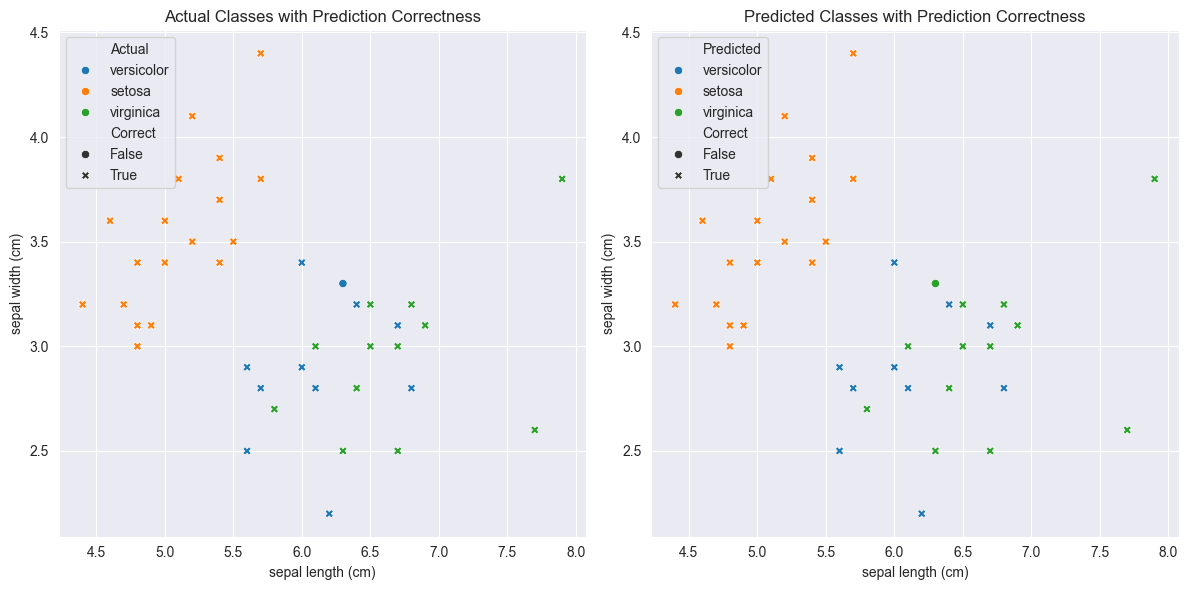

In [14]:
# Visualize the predictions
plt.figure(figsize=(12, 6))

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Feature 1': X_test[:, 0],
    'Feature 2': X_test[:, 1],
    'Actual': [target_names[i] for i in y_test],
    'Predicted': [target_names[i] for i in y_pred]
})

# Create a 'Correct' column
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# Plot predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Actual', style='Correct', data=results_df)
plt.title('Actual Classes with Prediction Correctness')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.subplot(1, 2, 2)
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Predicted', style='Correct', data=results_df)
plt.title('Predicted Classes with Prediction Correctness')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()